current plot is  Review
current plot is  Experiment
current plot is  Theory


c:\Users\renxinrui\Documents\Wmp\rxr\rxr_uncertainty_overall\Utils\fit.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  rangeGap = np.array(rangeGap)


[ 5.00115541e+11  4.81640539e-01 -4.58060105e+02]
sum_error**2 0.20159359896019252
popt: [ 5.00115541e+11  4.81640539e-01 -4.58060105e+02]
系数A: 500115541383.4786
系数n: 0.4816405393268279
系数EA: -458.06010465092993
系数协方差: [[ 1.44554752e-17 -1.98147325e-11 -8.32008673e-08]
 [-1.98147325e-11  4.43307800e-05  1.14046981e-01]
 [-8.32008673e-08  1.14046981e-01  4.78876290e+02]]
参数标准差: [3.80203566e-09 6.65813638e-03 2.18832422e+01]
RSE: 0.5137236817822933
RSE2: 0.5137236817822933
std: 0.07189622131937676
系数yvals: [13.55526229 13.44966037 13.39686967 13.36869558 13.35357487 13.3459824
 13.34298995 13.34292494 13.34477652 13.34790635 13.35189707 13.35646814
 13.36142664 13.36663754 13.37200491 13.37745988 13.38295257 13.38844671
 13.39391583 13.39934069 13.40470736 13.41000586 13.4152292 ]


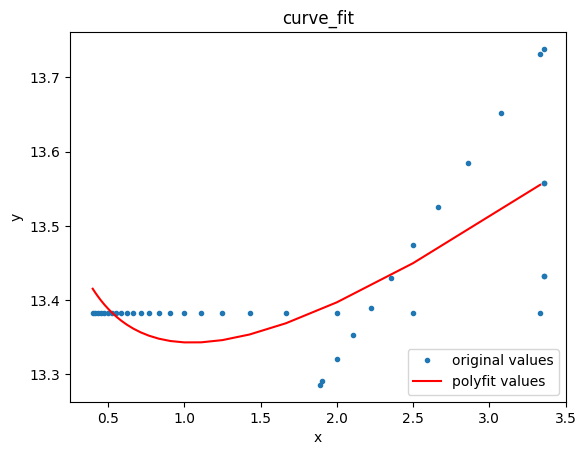

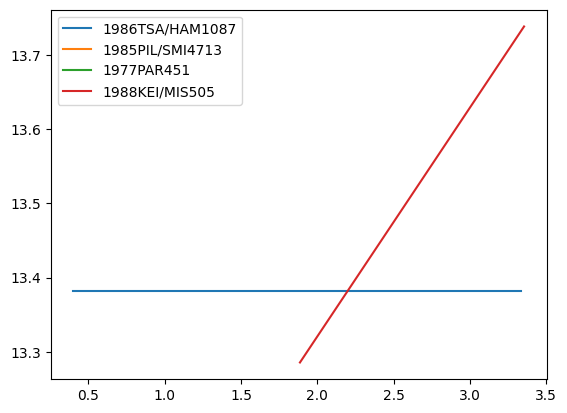

want to find  CH3O2+CH3<=>CH3O+CH3O
TT find it  CH3O2+CH3<=>CH3O+CH3O                                        +5.0800000E+012 +0.0000000E+000 -1.4110000E+003   !\AUTHOR: !\REF:KEIFFER, M. ET AL.,J. CHEM. SOC. FARADAY TRANS. 2: 84, 505 (1988) !\COMMENT:

CH3O2 CH3 CH3O CH3O
hen find it  CH3O2+CH3=2CH3O
['CH3O2+CH3=2CH3O', '5.8490e+11', '0.353', '-1460.00']


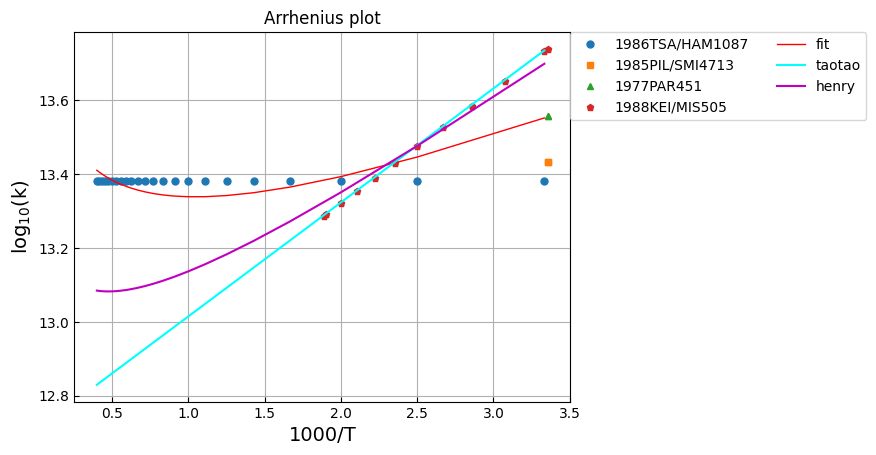

In [1]:
from Utils.DataConvert import ConvertData
from Utils.fit import Fit
from Utils.FindReaction import FindReaction
from Utils.Format import Format
from Utils.GetFileDir import GetFileDir
from Utils.GetReactionNum import GetReactionNum
from Utils.plot import Plot
import math

reactionnum = GetReactionNum()
excelname = GetFileDir(reactionnum,'forwardexcel')
outname = GetFileDir(reactionnum,'forwardtxt')

#转换web excel数据到txt文件
ConvertData(excelname, outname)
#拟合数据
A,n,EAR = Fit(outname,reactionnum)
K0 = 0
#把拟合的数据写入文件
fd = open(outname,'a+')
fitoneLine = Format('fit','fit',300,2500,A,n,EAR,K0)
fd.write(fitoneLine) 

#把TT和henrry数据写入文件,根据excel的名字来找到反应
ttdata,hendata = FindReaction(excelname,henryname='CH3O2+CH3=2CH3O')
A = float(ttdata[0])
n = float(ttdata[1])
EA = float(ttdata[2])
EAR = EA/1.987
K0 = 0
ttoneLine = Format('Compare','taotao',300,2500,A,n,EAR,K0)
fd.write(ttoneLine) 

#有可能找不到henry的数据
if(len(hendata) != 0):
    A = float(hendata[0])
    n = float(hendata[1])
    EA = float(hendata[2])
    EAR = EA/1.987
    K0 = 0
    henoneLine = Format('0','henry',300,2500,A,n,EAR,K0)
    fd.write(henoneLine)
fd.close()

Plot(outname)